In [82]:
# %sh

# wget https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv("police_killings.csv")
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [84]:
print(police_killings.columns.values)

['name' 'age' 'gender' 'raceethnicity' 'month' 'day' 'year' 'streetaddress'
 'city' 'state' 'latitude' 'longitude' 'state_fp' 'county_fp' 'tract_ce'
 'geo_id' 'county_id' 'namelsad' 'lawenforcementagency' 'cause' 'armed'
 'pop' 'share_white' 'share_black' 'share_hispanic' 'p_income' 'h_income'
 'county_income' 'comp_income' 'county_bucket' 'nat_bucket' 'pov' 'urate'
 'college']


In [85]:
print(police_killings["raceethnicity"].value_counts())

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


### Shootings by race

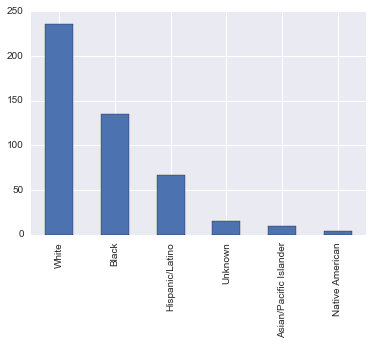

In [86]:
raceethnicity_killings = police_killings["raceethnicity"].value_counts()

raceethnicity_killings.plot(kind="bar")
plt.show()
plt.close()

### Shootings by regional income

police_killings: (467, 34)
income: (465, 34)
object
int32


C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


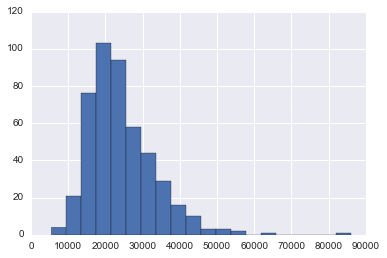

In [87]:
# Filter "-" records
income = police_killings[police_killings["p_income"] != "-"]
print("police_killings: {0}".format(police_killings.shape))
print("income: {0}".format(income.shape))

# Convert p_income data type to integer
income["p_income"] = income["p_income"].astype(int)
print(police_killings["p_income"].dtypes)
print(income["p_income"].dtypes)

# Plot a histogram
income["p_income"].hist(bins=20)
plt.show()
plt.close()

### Shootings by state

In [88]:
# https://www.census.gov/popest/data/state/asrh/2015/files/SCPRC-EST2015-18+POP-RES.csv

state_pop = pd.read_csv("SCPRC-EST2015-18+POP-RES.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [89]:
state_pop.dtypes

SUMLEV                 int64
REGION                object
DIVISION              object
STATE                  int64
NAME                  object
POPESTIMATE2015        int64
POPEST18PLUS2015       int64
PCNT_POPEST18PLUS    float64
dtype: object

In [90]:
print(police_killings["state_fp"].head())
print(state_pop["STATE"].head())

0     1
1    22
2    55
3     6
4    39
Name: state_fp, dtype: int64
0    0
1    1
2    2
3    4
4    5
Name: STATE, dtype: int64


In [91]:
counts = police_killings["state_fp"].value_counts()

In [92]:
# Create new dataframe

states = pd.DataFrame({
        "STATE": counts.index, 
        "shootings": counts
    })

states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [93]:
# Join shootings with state population

states = states.merge(state_pop[["STATE", "NAME", "POPESTIMATE2015"]], on="STATE")

states.head()

,STATE,shootings,NAME,POPESTIMATE2015
0,6,74,California,39144818
1,48,47,Texas,27469114
2,12,29,Florida,20271272
3,4,25,Arizona,6828065
4,40,22,Oklahoma,3911338


In [94]:
# Create population (in millions) column

states["pop_millions"] = states["POPESTIMATE2015"] / 1000000

states.head()

,STATE,shootings,NAME,POPESTIMATE2015,pop_millions
0,6,74,California,39144818,39.144818
1,48,47,Texas,27469114,27.469114
2,12,29,Florida,20271272,20.271272
3,4,25,Arizona,6828065,6.828065
4,40,22,Oklahoma,3911338,3.911338


In [95]:
# Create shootings per million people column

states["rate"] = states["shootings"] / states["pop_millions"]

states = states.sort_values(by="rate", ascending=False)

states.head()

,STATE,shootings,NAME,POPESTIMATE2015,pop_millions,rate
4,40,22,Oklahoma,3911338,3.911338,5.624674
3,4,25,Arizona,6828065,6.828065,3.661359
27,31,6,Nebraska,1896190,1.896190,3.164240
34,15,4,Hawaii,1431603,1.431603,2.794071
39,2,2,Alaska,738432,0.738432,2.708442


### State by state differences

In [100]:
share = ["share_black", "share_white", "share_hispanic"]

share_filter = (police_killings["share_black"] != "-") & (police_killings["share_white"] != "-") & \
    (police_killings["share_hispanic"] != "-")
pk = police_killings[share_filter]
print(police_killings.shape)
print(pk.shape)

pk[share] = pk[share].astype(float)

(467, 34)
(465, 34)


In [106]:
highest_10 = states["STATE"].head(10)
lowest_10 = states["STATE"].tail(10)

highest_10_df = police_killings[police_killings["state_fp"].isin(highest_10)]
lowest_10_df = police_killings[police_killings["state_fp"].isin(lowest_10)]

print(highest_10_df.shape)
print(lowest_10_df.shape)

print(highest_10_df.head())
print(lowest_10_df.head())

(93, 34)
(56, 34)
               name age gender    raceethnicity    month  day  year  \
1    Aaron Rutledge  27   Male            White    April    2  2015   
5     Adam Reinhart  29   Male            White    March    7  2015   
21  Andre Murphy Sr  42   Male            Black  January    7  2015   
24   Andrew Jackson  26   Male            White    April   29  2015   
42   Aurelio Duarte  40   Male  Hispanic/Latino    March    8  2015   

             streetaddress           city state    ...     share_hispanic  \
1   300 block Iris Park Dr      Pineville    LA    ...                0.5   
5      18th St and Palm Ln        Phoenix    AZ    ...                 79   
21          1223 Omaha Ave        Norfolk    NE    ...                2.9   
24      1200 W Florida Ave      Chickasha    OK    ...                9.7   
42         3632 SW 38th St  Oklahoma City    OK    ...               56.6   

    p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
1      1467

In [146]:
highest_mean = pd.Series(highest_10_df.mean(), name="highest")
lowest_mean = pd.Series(lowest_10_df.mean(), name="lowest")

compared_mean = pd.concat([highest_mean, lowest_mean], axis=1)
pd.options.display.float_format = '{:20,.2f}'.format
print(compared_mean)

                           highest               lowest
day                          15.68                15.02
year                      2,015.00             2,015.00
latitude                     35.63                41.36
longitude                  -105.73               -80.42
state_fp                     19.65                32.89
county_fp                    46.14                68.89
tract_ce                245,194.46           254,610.11
geo_id           19,691,546,269.73    32,962,004,610.11
county_id                19,691.30            32,961.75
pop                       4,269.34             4,079.30
h_income                 43,327.15            45,410.44
county_income            48,702.17            54,963.66
comp_income                   0.90                 0.83
county_bucket                 2.48                 2.30
nat_bucket                    2.26                 2.42
urate                         0.10                 0.13
college                       0.22              